In [3]:
#import important stuff
import os
import importlib
import image2vec
import imageUtils
importlib.reload(image2vec)
importlib.reload(imageUtils)
from image2vec import *
from imageUtils import *

matplotlib.use('nbagg')
%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,5)

World dimensions will be:   [ 56.34 x 37.40 ]cm


<IPython.core.display.Javascript object>


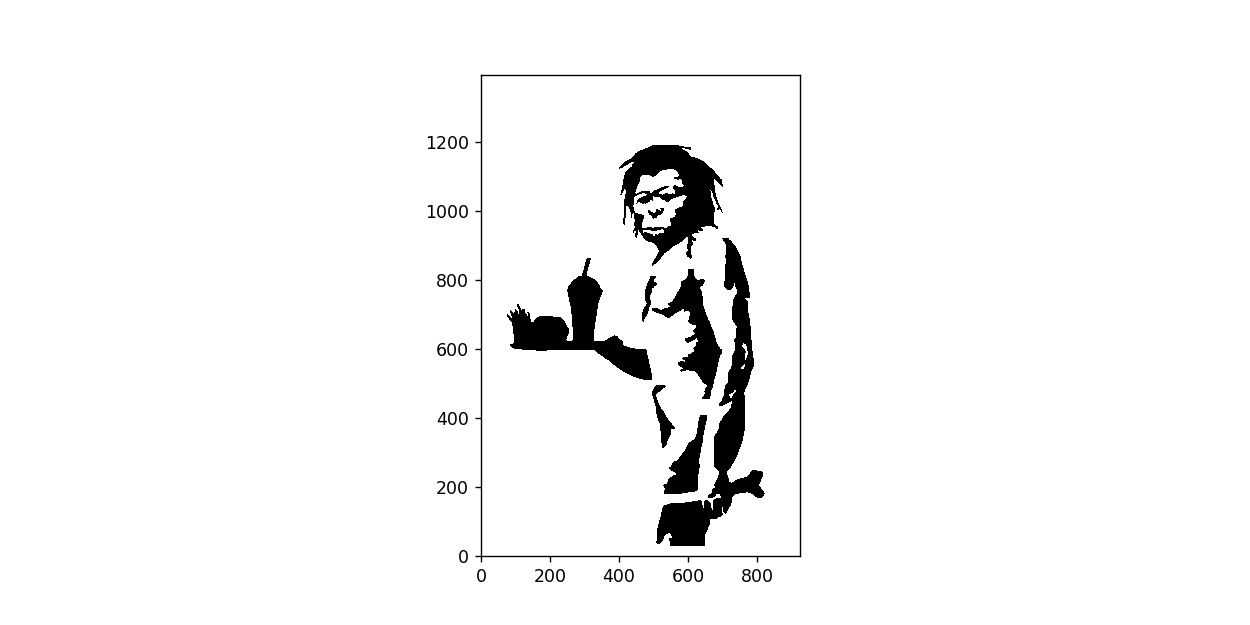

light (px): 447.5 1642.5935828877004 495.18716577540107
light (mm): 180.73974082073434 663.4233261339092 200.0


<IPython.core.display.Javascript object>


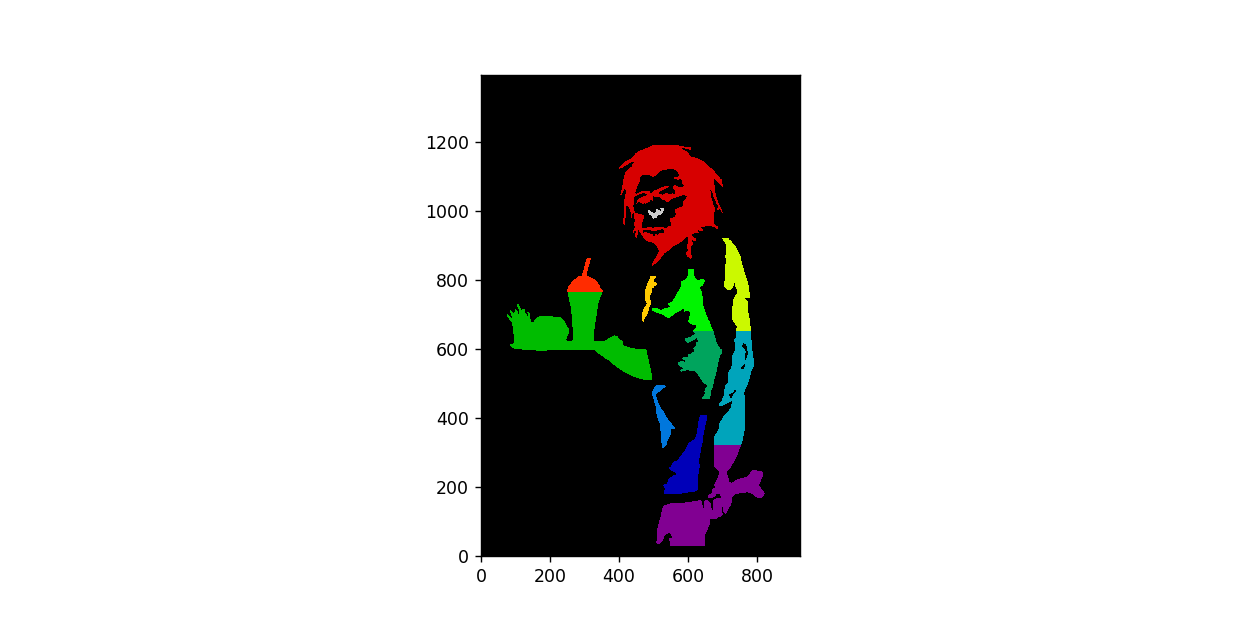

<IPython.core.display.Javascript object>


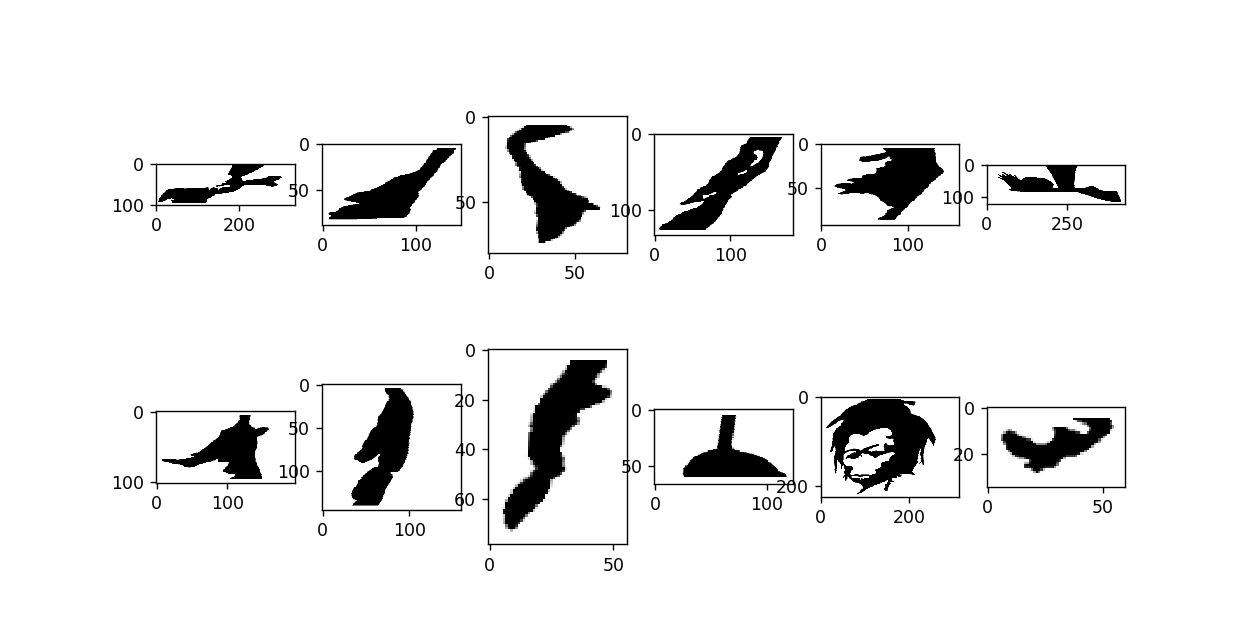

In [6]:

importlib.reload(imageUtils)
from imageUtils import *

#Constants
IMAGE_NAME = 'caveman'  #'ray'#'test'#'caveman'#'test'#'sunFlower'
ext = '.bmp'# '.bmp' # '.png'
boardThckns = 6.4 #mm
maxDistZLightMM = 200 #mm
maxDistYLightMM = 100 #mm
partsMargin = 1 #mm
boadLimit = np.array([790, 384])
maxBoardDim = boadLimit - np.array([10, 10])

fileName = 'photos/' + IMAGE_NAME + ext
drawStuff = True #False #True

#read image
img = readImg(fileName)

scale1 = max(maxBoardDim)/max(img.shape)
scale2 = min(maxBoardDim)/min(img.shape)
scalePix2mm = min(scale1,scale2)

print('World dimensions will be:   [',"%.2f" % (scalePix2mm*img.shape[0]/10), "x", "%.2f" % (scalePix2mm*img.shape[1]/10), "]cm")

if not os.path.isdir('out\\' + IMAGE_NAME):
    os.mkdir('out\\' + IMAGE_NAME)
if(drawStuff):
    drawBWf(img)
    
#define coordinates and light source
imLObj = getImLightStruct(img,scalePix2mm,maxDistZLightMM,maxDistYLightMM)

#find components
components = measure.label(img, background=1);
if(drawStuff):
    drawUnique(components)

#warp the shit out of it
allWarped,botCoords = warpComponents(components,img,imLObj,drawStuff)

In [ ]:
#################################
####     Image to Vector     ####
#################################

<IPython.core.display.Javascript object>


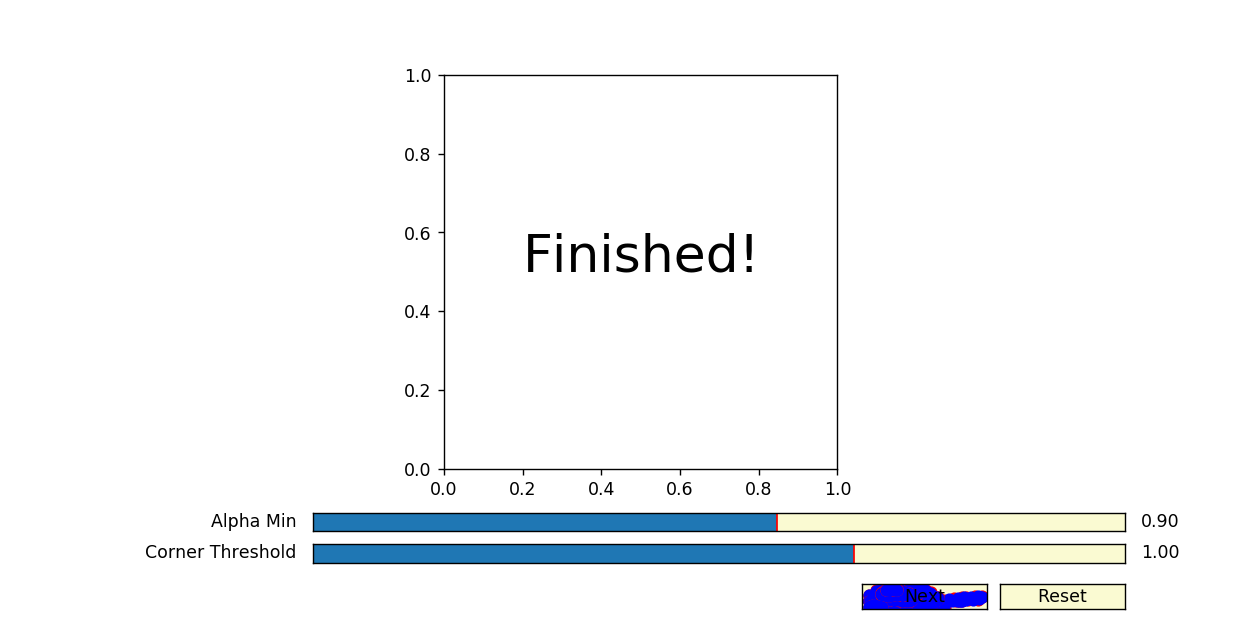

pix2mm 0.4038876889848812
['0, 0, 123, 39']
0, 0, 123, 39
['0, 0, 58, 34']
0, 0, 58, 34
['0, 0, 27, 30']
0, 0, 27, 30
['0, 0, 69, 52']
0, 0, 69, 52
['0, 0, 57, 35']
0, 0, 57, 35
['0, 0, 168, 47']
0, 0, 168, 47
['0, 0, 64, 39']
0, 0, 64, 39
['0, 0, 43, 57']
0, 0, 43, 57
['0, 0, 20, 30']
0, 0, 20, 30
['0, 0, 49, 25']
0, 0, 49, 25
['0, 0, 105, 89']
0, 0, 105, 89
['0, 0, 22, 12']
0, 0, 22, 12


In [7]:
import svgpathtools as svg
importlib.reload(image2vec)
importlib.reload(imageUtils)
from image2vec import *
from imageUtils import *

fig, ax = plt.subplots()
#plt.subplots_adjust(left=0.25, bottom=0.25)
plt.subplots_adjust(bottom=0.25)
cornerTh0 = 1
deltaCorenrTh = 0.05
alphaMin0 = 0.9
deltaAlphaMin = 0.05

cornerTh = 1
alphaMin = 0.9
pathObjs = []
svgPaths = []

drawVerbose = True #False

def pickImage():
    global iW
    global allWarped
    global warped
    global warpedOrig
    global botCoords
    global botCoord
    
    warped = allWarped[iW]
    botCoord = botCoords[iW]
    warpedOrig = warped
    warped = np.where(warped < 0.5, 0, 1)

def calcSlow():
    global allWarped
    global warped
    global warpedOrig
    global paths
    global drawVerbose
    global pathObjs
    global ax
    global botCoord
    
    ax.clear()
    imgplot = ax.imshow(warpedOrig, cmap="gray")
    ax.invert_yaxis()
    
    #get paths in image
    paths = getAllPathsInImg(warped)
    #turn paths into bezier curves
    pathObjs = getPathObjs(paths,botCoord,drawVerbose)
    
def calcFast():
    global allWarped
    global warped
    global warpedOrig
    global paths
    global pathObjs
    global ax
    global cornerTh
    global alphaMin
    global svgPaths
    global botCoord
    
    ax.clear()
    imgplot = ax.imshow(warpedOrig, cmap="gray")
    ax.invert_yaxis()
    svgPaths = []
    nObjs = len(pathObjs)
    for i in range(0,nObjs):
        pathObj = pathObjs[i]
        # create svg path
        svgPath = obj2svgPath(pathObj,cornerTh,alphaMin,i,boardThckns,scalePix2mm,partsMargin/2)
        svgPathUnscaled = svgPath.scaled(1/scalePix2mm)
        svgPaths.append(svgPath)
        #draw svg path
        drawSvgPathAxis(ax,svgPathUnscaled,10000)



###########
iW = 0
pickImage()
calcSlow()
calcFast()
############

axcolor = 'lightgoldenrodyellow'
axCorTh = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axAlpMin = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sCornerTh = Slider(axCorTh, 'Corner Threshold', 0.3, 1.35, valinit=cornerTh0, valstep=deltaCorenrTh)
sAlphaMin = Slider(axAlpMin, 'Alpha Min', 0.3, 1.35, valinit=alphaMin0, valstep=deltaAlphaMin)


def update(val):
    global cornerTh
    global alphaMin
    global sCornerTh
    global sAlphaMin
    
    cornerTh = sCornerTh.val
    alphaMin = sAlphaMin.val
    
    calcFast()


sCornerTh.on_changed(update)
sAlphaMin.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

nextax = plt.axes([0.69, 0.025, 0.1, 0.04])
button2 = Button(nextax, 'Next', color=axcolor, hovercolor='0.975')


print('pix2mm',scalePix2mm)

def reset(event):
    global ax
    global sCornerTh
    global sCornerTh
    sCornerTh.reset()
    sAlphaMin.reset()
    ax.clear()
    
button.on_clicked(reset)

def nexte(event):
    global ax
    global iW
    global svgPaths
    
    fname = 'out\\' + IMAGE_NAME + '\\' + IMAGE_NAME+str(iW)+'.svg'
    saveSVG(svgPaths, fname)
    
    if(iW < len(allWarped) - 1):
        iW = iW + 1
        pickImage()

        calcSlow()
        calcFast()
        return True
    else:
        ax.clear()
        ax.text(0.2, 0.5, 'Finished!', dict(size=30))
        return False


        
button2.on_clicked(nexte)

while nexte(None):
    pass

plt.show()

<IPython.core.display.Javascript object>


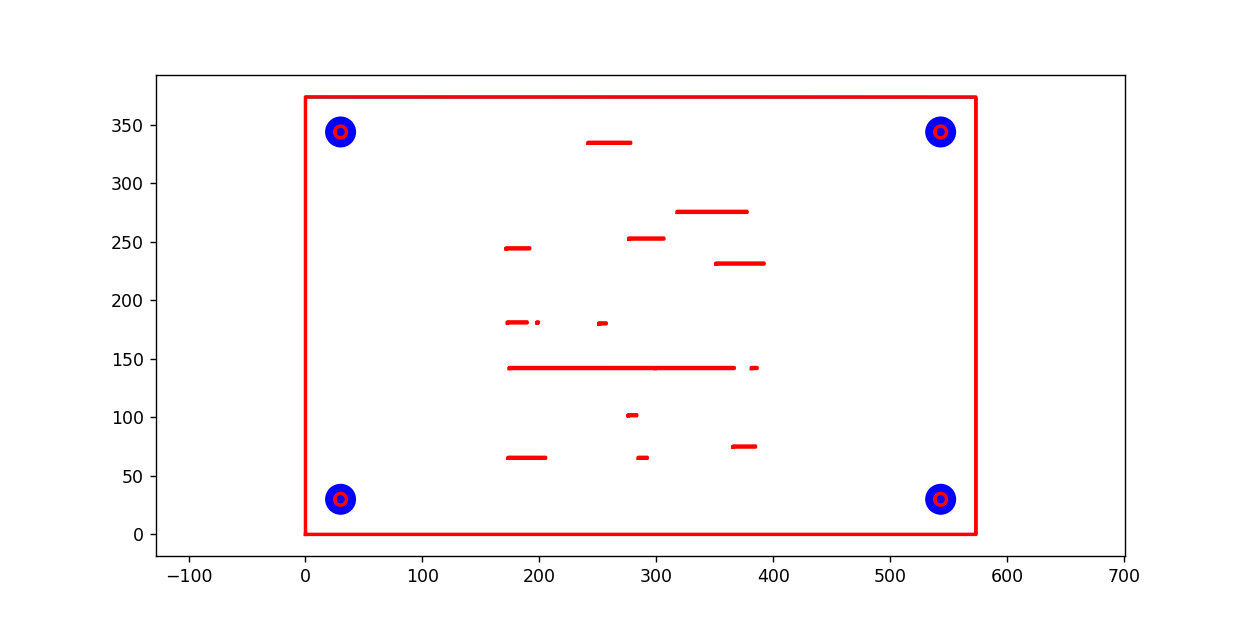

['0, 0, 573, 374']
0, 0, 573, 374


In [26]:
importlib.reload(image2vec)
from image2vec import *

#create back board vector
partsThckns = 0.8 #mm
holesMargin = 0.01 #mm
circleMetalDiam = 25 #mm
circleHoleDiam = 10 #mm
circleDist = 30 #mm
circleHoleRad = 0.5*circleHoleDiam

svgPaths = []

h = scalePix2mm*img.shape[0]
w = scalePix2mm*img.shape[1]

fig, ax = plt.subplots()
plt.axis('equal')
x = [0, 0, w, w, 0]
y = [0, h, h, 0, 0]
plt.plot(x, y)

svgSegments = []
seg1 = svg.Line(0+1j*0, 0+1j*h)
seg2 = svg.Line(0+1j*h, w+1j*h)
seg3 = svg.Line(w+1j*h, w+1j*0)
seg4 = svg.Line(w+1j*0, 0+1j*0)

svgSegments.append(seg1)
svgSegments.append(seg2)
svgSegments.append(seg3)
svgSegments.append(seg4)

svgPath = svg.Path(*svgSegments)
svgPaths.append(svgPath)

for i in range(0,len(botCoords)):
    botCoord = botCoords[i]
    
    for row in range(0,botCoord.botSegments.shape[0]):
        x1 = botCoord.botSegments[row,0]
        x2 = botCoord.botSegments[row,1]
    
        l = scalePix2mm*x1 - 0.5*holesMargin + 0.5*partsMargin
        r = scalePix2mm*x2 + 0.5*holesMargin - 0.5*partsMargin
        t = scalePix2mm*botCoord.y + 0.5*partsThckns + 0.5*holesMargin
        b = scalePix2mm*botCoord.y - 0.5*partsThckns - 0.5*holesMargin

        x = [l, l, r, r, l]
        y = [b, t, t, b, b]

        svgSegments = []
        seg1 = svg.Line(l+1j*b, l+1j*t)
        seg2 = svg.Line(l+1j*t, r+1j*t)
        seg3 = svg.Line(r+1j*t, r+1j*b)
        seg4 = svg.Line(r+1j*b, l+1j*b)

        svgSegments.append(seg1)
        svgSegments.append(seg2)
        svgSegments.append(seg3)
        svgSegments.append(seg4)

        svgPath = svg.Path(*svgSegments)
        svgPaths.append(svgPath)
    
        #plt.plot(x, y)
    
    
def getCirclePath(centerX,centerY,radius):
    circle = []
    arc1 = svg.Arc(centerX - radius + 1j*centerY, radius + 1j*radius, 0, 0, True, centerX + radius + 1j*centerY, False)
    arc2 = svg.Arc(centerX + radius + 1j*centerY, radius + 1j*radius, 0, 0, True, centerX - radius + 1j*centerY, False)
    circle.append(arc1)
    circle.append(arc2)
    
    return svg.Path(*circle)
    

circlePath = getCirclePath(circleDist,circleDist,circleHoleRad)
svgPaths.append(circlePath)

circlePath = getCirclePath(w - circleDist,circleDist,circleHoleRad)
svgPaths.append(circlePath)

circlePath = getCirclePath(w - circleDist,h - circleDist,circleHoleRad)
svgPaths.append(circlePath)

circlePath = getCirclePath(circleDist,h - circleDist,circleHoleRad)
svgPaths.append(circlePath)


circle = plt.Circle((circleDist, circleDist), 0.5*circleMetalDiam, color='b')
ax.add_artist(circle)

circle = plt.Circle((w - circleDist, circleDist), 0.5*circleMetalDiam, color='b')
ax.add_artist(circle)

circle = plt.Circle((w - circleDist, h - circleDist), 0.5*circleMetalDiam, color='b')
ax.add_artist(circle)

circle = plt.Circle((circleDist, h - circleDist), 0.5*circleMetalDiam, color='b')
ax.add_artist(circle)


plt.show()




#draw svg path
drawSvgPathsAxis(ax,svgPaths,10000)

#save svg file margin_size=0 ,
fname = 'out\\' + IMAGE_NAME + '\\' + IMAGE_NAME+'_board'+'.svg'
saveSVG(svgPaths, fname)
